In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import os
import h5py

from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#         # break

In [3]:
TRAIN_DATA = '/kaggle/input/isic-2024-challenge/train-metadata.csv'
TEST_DATA = '/kaggle/input/isic-2024-challenge/test-metadata.csv'
TRAIN_IMAGE_PATH = '/kaggle/input/isic-2024-challenge/train-image/image/'

In [4]:
train_df = pd.read_csv(TRAIN_DATA)

In [5]:
pd.set_option('display.max_columns', None)
train_df.head(4)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

In [7]:
#some columns had NaN in  df.head(4) so just making sure, not all columns have the same
# train_df.iddx_2.unique()  
train_df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

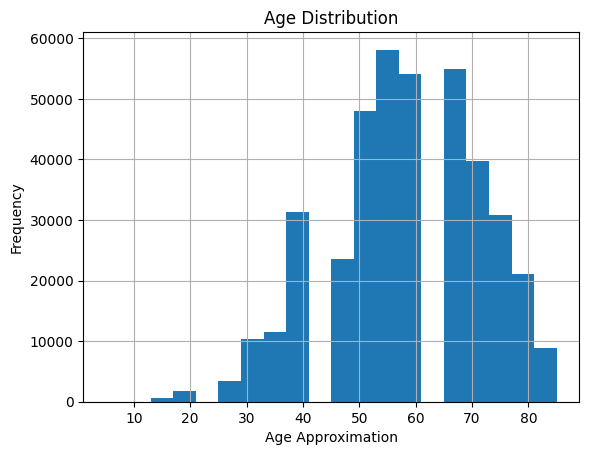

In [8]:
import matplotlib.pyplot as plt
train_df['age_approx'].hist(bins=20)
plt.xlabel('Age Approximation')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<Axes: title={'center': 'Sex Distribution'}, xlabel='sex'>

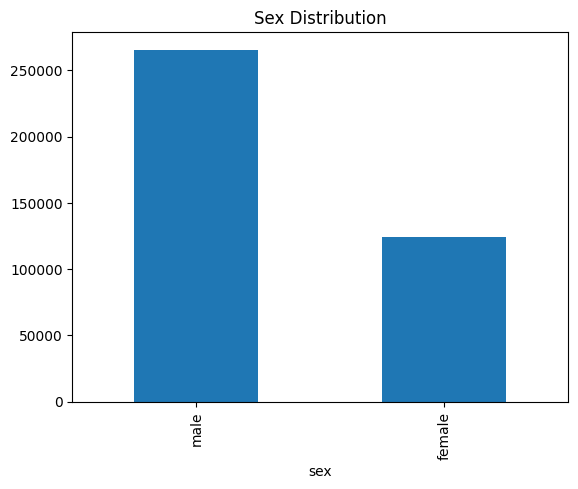

In [9]:
train_df['sex'].value_counts().plot(kind='bar', title='Sex Distribution')

In [10]:
# train_df['target'].value_counts().plot(kind='bar', title='Target Distribution')
#no use of bar graoh, the class 0 is 1000 times more

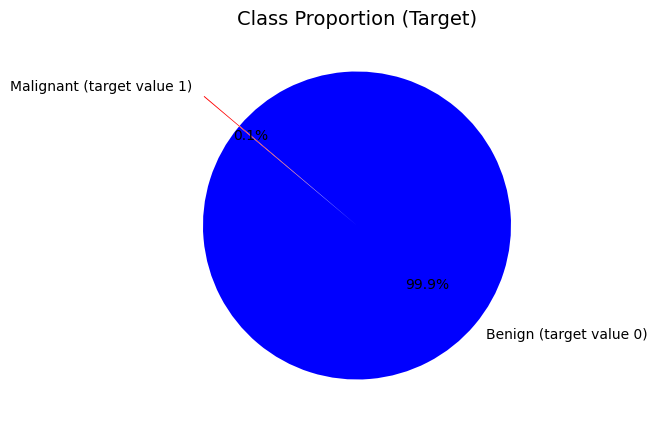

In [11]:
class_counts = train_df.target.value_counts()
#0 40066
#1 393
plt.figure(figsize=(5, 5))
plt.pie(
    class_counts, 
    labels=['Benign (target value 0)', 'Malignant (target value 1)'], 
    colors=['blue', 'red'], 
    autopct='%1.1f%%', 
    startangle=140,   # angle at which the other class is shown 
    explode=[0, 0.3]  # Slightly explode the minority class else it is not visible
)
plt.title('Class Proportion (Target)', fontsize=14)
plt.show()
#this shows that the given data is inbalanced, we need to do something in order to deal with this skewed data


In [12]:
t = train_df.groupby('target')['age_approx'].mean()
# print(type(t))
print("Approx Age for Maglignant class is ",t.loc[1])
print("Approx Age for Benign class is ",t.loc[0])

Approx Age for Maglignant class is  61.37179487179487
Approx Age for Benign class is  58.00969409683038


In [30]:
train_image_path = TRAIN_IMAGE_PATH+(train_df.isic_id)+'.jpg'
# print(train_image_path[0])
train_df['image_path'] = train_image_path
train_df = train_df[['image_path', 'isic_id', 'target']]

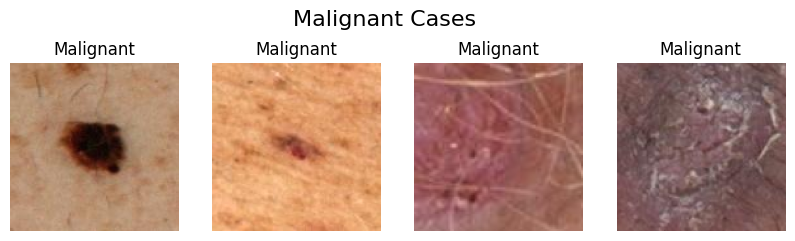

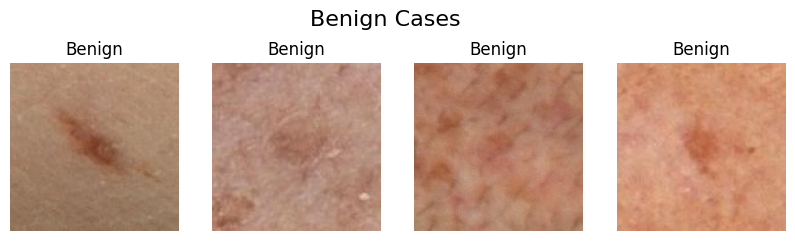

In [31]:
"""Randomly showing 4 images of Malignant and Benign"""
malignant_df = train_df[train_df['target'] == 1]  # Malignant cases
benign_df = train_df[train_df['target'] == 0]    # Benign cases


def load_images(image_ids, image_path, num_images=4):
    images = []
    for isic_id in random.sample(image_ids, min(num_images, len(image_ids))):
        try:
            img_path = f"{image_path}{isic_id}.jpg"
            img = Image.open(img_path)
            images.append((img, train_df.loc[train_df['isic_id'] == isic_id, 'target'].values[0]))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images

# Loading images for both classes
loaded_positive_images = load_images(malignant_df['isic_id'].tolist(), TRAIN_IMAGE_PATH, num_images=4)
loaded_negative_images = load_images(benign_df['isic_id'].tolist(), TRAIN_IMAGE_PATH, num_images=4)


def display_images(images, title, num_images=4):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)
    
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i][0])  
        plt.axis('off')  # Hide axes
        plt.title('Malignant' if images[i][1] == 1 else 'Benign')  # Show class label as title


# displaying images
display_images(loaded_positive_images, title='Malignant Cases', num_images=4)
display_images(loaded_negative_images, title='Benign Cases', num_images=4)

plt.show()

In [32]:
# DATA AUGMENTATION
print(benign_df.shape)
print(malignant_df.shape)

(400666, 3)
(393, 3)


In [27]:
print("Target Values",x.target.unique())
x.head(3)

Target Values [0 1]


,image_path,isic_id,target
0,/kaggle/input/isic-2024-challenge/train-image/...,ISIC_0015670,0
1,/kaggle/input/isic-2024-challenge/train-image/...,ISIC_0015845,0
2,/kaggle/input/isic-2024-challenge/train-image/...,ISIC_0015864,0


In [1]:
datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalize pixel values to [0, 1]
    rotation_range=30,            # Random rotation
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shearing transformations
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Flip horizontally
    fill_mode='nearest'           # Fill strategy for empty pixels
)

# Flow from directory
train_generator = datagen.flow_from_directory(
    'train_images',               # Path to training image directory
    target_size=(224, 224),       # Resize all images to 224x224
    batch_size=32,                # Number of images per batch
    class_mode='binary'           # Output labels (e.g., binary classification)
)


# need to pass this train_generator in model.fit function

In [ ]:
# type(benign_df)
shuffled = benign_df.sample(frac=1)
distributed_benign_df = np.array_split(shuffled, 509)   # benign_df.shape[0] / malignant_df.shape[0] = 1019.xx
#####################
# NOW ALL THE DATA SETS WILL HAVE ALOMST SAME AMOUNT DATA POINTS (2:1 RATIO FOR CLASS 0: CLASS 1) 
#####################